In [32]:
import numpy as np
import matplotlib.pyplot as plt
import calc_rotation

In [33]:
dt = 1
grid_unit = 1

def open_file(path, *args):
    return np.load(path)

In [34]:
path = '/home/pawel/Work/HOME/Faraday_Rotation/data/steps_sample_1/'

In [35]:
file_list = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'Bz', dt, grid_unit, 'step_', '.npy',
                                   open_file)

In [36]:
path = '/home/pawel/Work/HOME/Faraday_Rotation/data/steps_sample_2/'

In [37]:
file_list2 = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'n_e', dt, grid_unit, 'step_', '.npy',
                                   open_file)

In [38]:
seq = np.arange(0,30,3)
seq2 = seq + 30
seq3 = [None] * seq.size
for ii in range(seq.size):
    seq3[ii] = (seq[ii], seq2[ii])
seq3

[(0, 30),
 (3, 33),
 (6, 36),
 (9, 39),
 (12, 42),
 (15, 45),
 (18, 48),
 (21, 51),
 (24, 54),
 (27, 57)]

In [58]:
sequence = calc_rotation.SimSequence.SimSequence({'Bz': file_list, 'n_e': file_list2},  (0,1, 1), [(0,31)],0 ,30, 1)

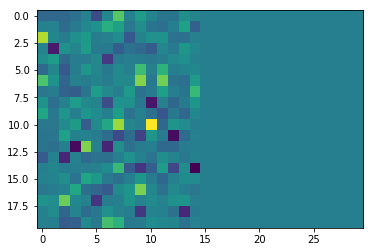

In [59]:
T = sequence.get_data('Bz', 0) * sequence.get_data('n_e', 0)
plt.imshow(T)

In [73]:
T[:,13]

array([ 0.49015124,  1.06962827, -0.39101357,  0.74978943,  0.51746184,
        0.14624331, -0.49459707, -0.32125337, -0.13440042, -0.76458601,
        0.39404441, -0.59638647, -0.08740426, -0.21998951,  0.46074699,
        0.41146221,  0.01021939,  0.65099653, -2.36028476, -0.42519335])

array([4.67138763e-310, 4.67138763e-310, 4.67138763e-310, 4.67138763e-310,
       4.67138763e-310, 4.67138763e-310, 4.67138763e-310, 4.67138763e-310,
       4.67138763e-310, 4.67138763e-310, 4.67138763e-310, 4.67138763e-310,
       4.67138763e-310, 4.67138763e-310, 4.67138763e-310, 4.67138763e-310,
       4.67138763e-310, 4.67138763e-310, 4.67138763e-310, 4.67138763e-310])

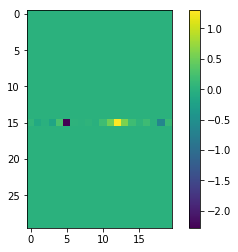

In [92]:
rotated = sequence.new_rotation_2d_perp(np.ones(1, dtype=np.float64), interpolation=False)
plt.imshow(rotated)
plt.colorbar()

rotated[1,:]

In [57]:
file = sequence.get_files('Bz')
sequence.get_data('Bz',0).shape

(20, 30)

In [22]:
np.nonzero(rotated)[0].shape

(600,)

In [52]:
%timeit sequence.new_rotation_2d_perp(np.ones(100000, dtype=np.float64), interpolation=False)

1.39 s ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit sequence.new_rotation_2d_perp(np.ones(100000, dtype=np.float64), interpolation=True)

1.37 s ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%timeit sequence.rotation_2d_perp(np.ones(100000, dtype=np.float64), interpolation=False)

118 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit sequence.rotation_2d_perp(np.ones(100000, dtype=np.float64), interpolation=True)

123 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
import cProfile
cProfile.runctx("sequence.new_rotation_2d_perp(np.ones(1, dtype=np.float64), interpolation=False)",
                globals(), locals(), "Profile9.prof")
import pstats
s = pstats.Stats("Profile9.prof")
s.strip_dirs().sort_stats("time").print_stats()

Mon Nov 26 14:49:55 2018    Profile9.prof

         21069633 function calls (21069452 primitive calls) in 5.133 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   330000    3.048    0.000    4.378    0.000 Kernel2D.pyx:151(x_loop)
  9300000    0.673    0.000    0.673    0.000 c_defs.pxd:7(d_square)
  4650000    0.347    0.000    0.347    0.000 Kernel2D.pyx:88(interpolate_up)
  4650000    0.309    0.000    0.309    0.000 Kernel2D.pyx:101(interpolate_down)
       10    0.281    0.028    5.014    0.501 Kernel2D.pyx:222(rotate_slice)
   600000    0.154    0.000    0.209    0.000 Kernel2D.pyx:186(sum_line_over_pulse)
       20    0.091    0.005    0.091    0.005 {built-in method io.open}
   330000    0.088    0.000    4.466    0.000 Kernel2D.pyx:177(inside_y_loop)
   600000    0.058    0.000    0.058    0.000 Kernel2D.pyx:211(write_out)
   600000    0.055    0.000    0.055    0.000 Kernel2D.pyx:10(__pyx_fuse_1sum_arr)
       20 

In [23]:
s.strip_dirs().sort_stats("call").print_stats()

Mon Nov 26 14:21:39 2018    Profile9.prof

         106233 function calls (106052 primitive calls) in 0.164 seconds

   Ordered by: call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    60000    0.005    0.000    0.005    0.000 Kernel2D.pyx:10(__pyx_fuse_1sum_arr)
     9000    0.001    0.000    0.001    0.000 c_defs.pxd:7(d_square)
     6000    0.014    0.000    0.019    0.000 Kernel2D.pyx:186(sum_line_over_pulse)
     6000    0.001    0.000    0.001    0.000 Kernel2D.pyx:211(write_out)
     4500    0.000    0.000    0.000    0.000 Kernel2D.pyx:88(interpolate_up)
     4500    0.000    0.000    0.000    0.000 Kernel2D.pyx:101(interpolate_down)
     3300    0.001    0.000    0.006    0.000 Kernel2D.pyx:177(inside_y_loop)
     3300    0.004    0.000    0.005    0.000 Kernel2D.pyx:151(x_loop)
1322/1301    0.000    0.000    0.001    0.000 {built-in method builtins.isinstance}
     1140    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}


In [45]:
import cProfile
cProfile.runctx("sequence.new_rotation_2d_perp(np.asarray([1], dtype=np.float64), interpolation=True)",
                globals(), locals(), "Profile_int.prof")
import pstats
s = pstats.Stats("Profile_int.prof")
s.strip_dirs().sort_stats("time").print_stats()

Mon Nov 26 13:59:57 2018    Profile_int.prof

         542009632 function calls (542009451 primitive calls) in 131.463 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  5500000   81.612    0.000  115.682    0.000 Kernel2D.pyx:151(x_loop)
255000000   15.930    0.000   15.930    0.000 c_defs.pxd:7(d_square)
127500000    9.131    0.000    9.131    0.000 Kernel2D.pyx:88(interpolate_up)
127500000    9.008    0.000    9.008    0.000 Kernel2D.pyx:101(interpolate_down)
       20    6.389    0.319    6.389    0.319 {built-in method numpy.core.multiarray.fromfile}
       10    5.100    0.510  124.844   12.484 Kernel2D.pyx:222(rotate_slice)
  5500000    1.547    0.000  117.229    0.000 Kernel2D.pyx:177(inside_y_loop)
 10000000    1.337    0.000    1.337    0.000 Kernel2D.pyx:211(write_out)
 10000000    1.107    0.000    1.178    0.000 Kernel2D.pyx:186(sum_line_over_pulse)
       20    0.132    0.007    0.132    0.007 {built-in method 